<img src="logo.png" width="190" height="60">
<center>
    <b>Seminario</b><br>
    <b>Author:  Juan Isaula</b>
<br><br>
<b>Resultado Preliminar:</b>
<h1>Neural Prophet</h1>
</center>
<i>Creado:     2022-Enero-31

Cargamos los Paquetes a Utilizar 

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
import pmdarima as pm


En esta ocasión utilizaremos un conjunto de datos del precio del Bitcoin vs USD de manera diaria desde las fechas:       2015-01-02 hasta 2020-12-29

In [2]:
df = pd.read_csv('BTC-USD.csv')
df

,ds,y
0,2015-01-02,315.03
1,2015-01-03,281.08
2,2015-01-04,264.20
3,2015-01-05,274.47
4,2015-01-06,286.19
...,...,...
2184,2020-12-25,24664.79
2185,2020-12-26,26437.04
2186,2020-12-27,26272.29
2187,2020-12-28,27084.81


<center>
Neural Prophet sin ajustes en los hiperparámetros
<center>

In [3]:
model = NeuralProphet() 
metrics = model.fit(df,freq='D',epochs=200)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
 91%|█████████ | 243/267 [00:07<00:00, 31.57it/s] 
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 7.98E-01
 92%|█████████▏| 246/267 [00:02<00:00, 117.19it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 6.83E-01
 94%|█████████▎| 250/267 [00:02<00:00, 124.14it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.60E-02, min: 6.83E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.50E-02
Epoch[200/200]: 100%|██████████| 200/200 [00:47<00:00,  4.20it/s, SmoothL1Loss=0.00641, MAE=1.07e+3, RMSE=1.42e+3, RegLoss=0]


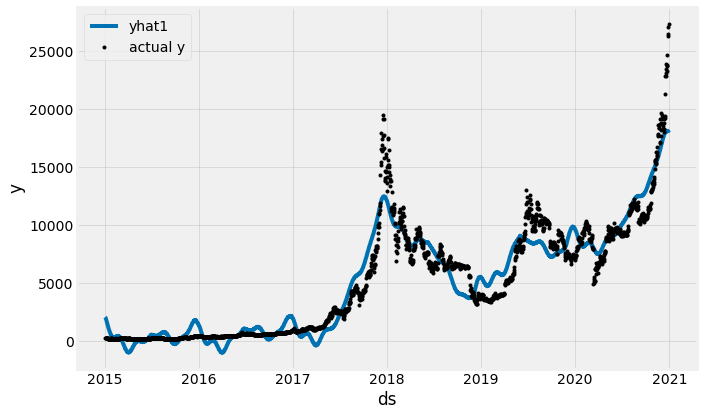

In [4]:
future = model.make_future_dataframe(df,n_historic_predictions=len(df))
forcast = model.predict(future)
forcasts_plot = model.plot(forcast)

<center>
Neural Prophet con ajuste en algún hiperparámetro
<center>

In [5]:
model = NeuralProphet(n_lags=15) 
metrics = model.fit(df,freq='D',epochs=200)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
 86%|████████▋ | 230/266 [00:02<00:00, 81.34it/s] 
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.94E-02, min: 6.20E-01
 87%|████████▋ | 232/266 [00:02<00:00, 109.47it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.02E-02, min: 4.90E-01
 89%|████████▉ | 238/266 [00:02<00:00, 103.30it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.43E-02, min: 6.71E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.43E-02
Epoch[200/200]: 100%|██████████| 200/200 [00:46<00:00,  4.33it/s, SmoothL1Loss=0.000281, MAE=156, RMSE=282, RegLoss=0]     


WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 2189 historic forecasts, reduced to 2174.


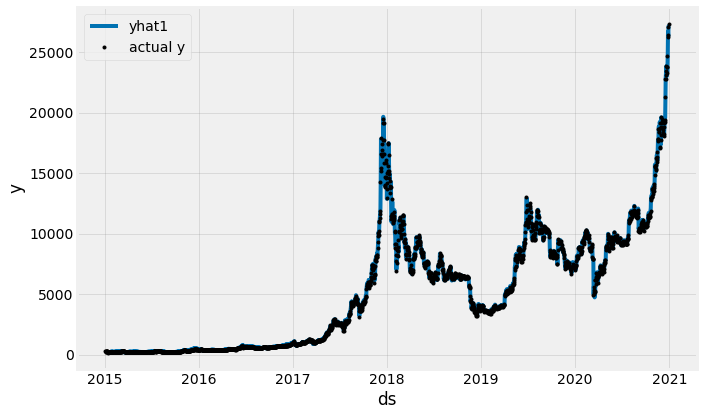

In [7]:
future = model.make_future_dataframe(df,n_historic_predictions=len(df))
forcast_1 = model.predict(future)
forcasts_plot = model.plot(forcast_1)

Cargamos los pronóstico hechos previamente con NeuralProphet con ajuste y no ajuste en los hiperparámetros en el dataframe (df).

In [8]:
df['NeuralProphet'] = forcast.loc[:,'yhat1']
df['NeuralProphetAj'] = forcast_1.loc[:,'yhat1']
#col = df.borrar.values[::-1]
#df['NeuralProphet'] = col
#df.drop(['borrar'],axis='columns',inplace=True)
df

,ds,y,NeuralProphet,NeuralProphetAj
0,2015-01-02,315.03,2095.324219,None
1,2015-01-03,281.08,2067.064453,None
2,2015-01-04,264.20,1971.377930,None
3,2015-01-05,274.47,1928.357910,None
4,2015-01-06,286.19,1845.611938,None
...,...,...,...,...
2184,2020-12-25,24664.79,18096.021484,23888.689453
2185,2020-12-26,26437.04,18116.121094,24846.816406
2186,2020-12-27,26272.29,18066.535156,26673.259766
2187,2020-12-28,27084.81,18067.123047,26299.927734


In [9]:
df.ds = pd.to_datetime(df.ds)
df.set_index('ds',inplace=True)
df

,y,NeuralProphet,NeuralProphetAj
ds,,,
2015-01-02,315.03,2095.324219,None
2015-01-03,281.08,2067.064453,None
2015-01-04,264.20,1971.377930,None
2015-01-05,274.47,1928.357910,None
2015-01-06,286.19,1845.611938,None
...,...,...,...
2020-12-25,24664.79,18096.021484,23888.689453
2020-12-26,26437.04,18116.121094,24846.816406
2020-12-27,26272.29,18066.535156,26673.259766


Gráfico de los datos originales, NeuralProphet y NeuralProphet con algún ajuste.

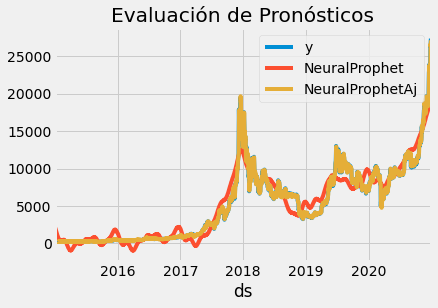

In [12]:
df.plot(title='Evaluación de Pronósticos');

<center>
<h1>Modelo SARIMAX<h1>
<center>

In [50]:
df = pd.read_csv('BTC-USD.csv', sep=',', parse_dates=['ds'], index_col='ds', encoding = 'utf-8')
df['ds']=df.index
df.tail()

,y,ds
ds,,
1979-04-18,101.70,1979-04-18
1979-04-17,101.24,1979-04-17
1979-04-16,101.12,1979-04-16
1979-04-12,102.00,1979-04-12
1979-04-11,102.31,1979-04-11


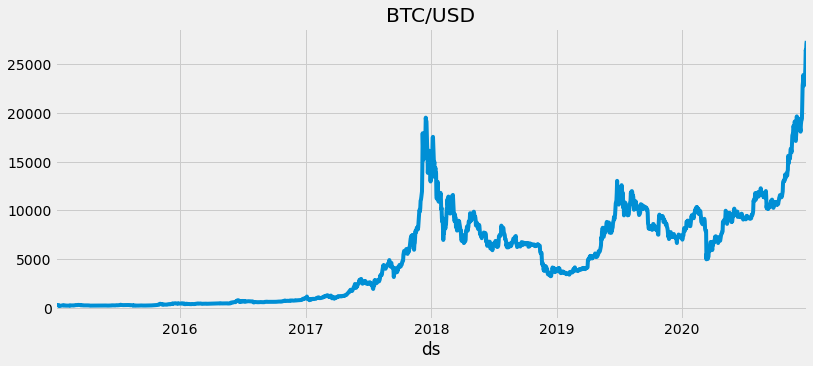

In [13]:
price_BTC = df['y']
price_BTC = price_BTC.dropna()
price_BTC.plot(figsize=(12,5))
plt.title('BTC/USD')
plt.show()

El histograma y la correspondiente función de densidad se ven acontinuación:

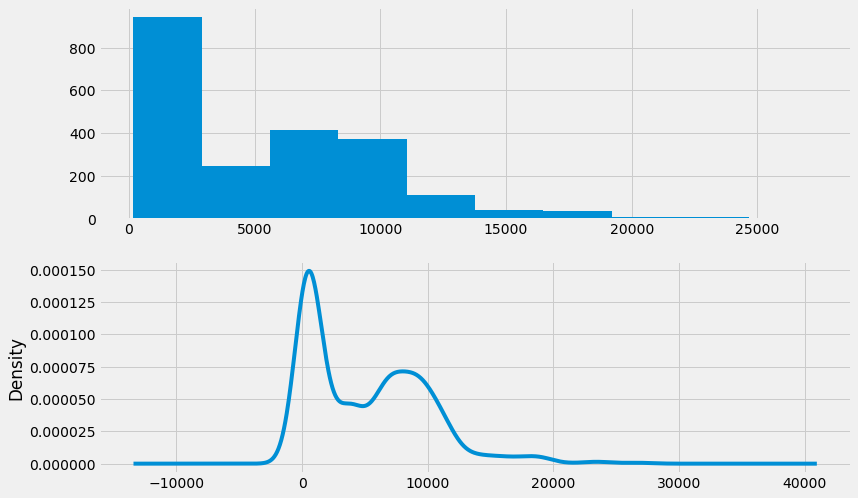

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,8))
price_BTC.hist(ax=ax1)
price_BTC.plot(kind='kde',ax=ax2)
plt.show()

La descomposición de esta serie en sus componentes de tendencia, estacional y residuales, se ve como sigue:

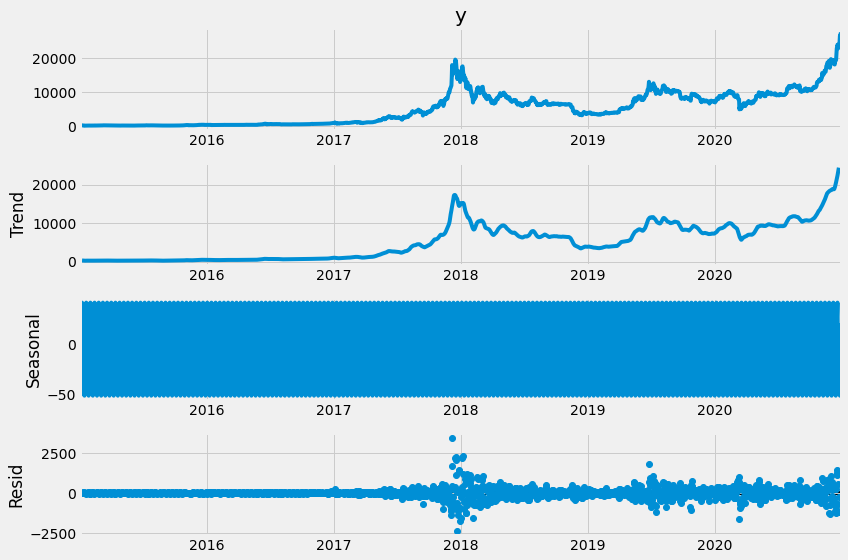

In [15]:
decomposition = seasonal_decompose(price_BTC, freq=12, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

Los correlogramas, se ven como sigue:

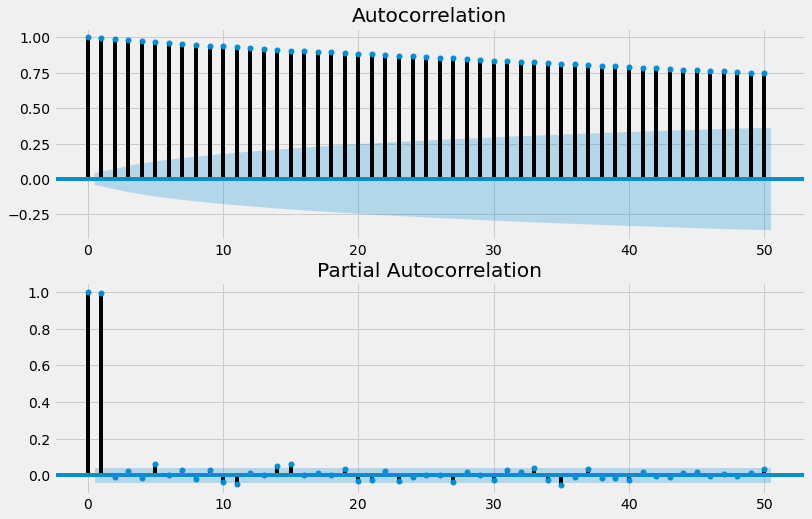

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=False, sharey=False)
ax1 = plot_acf(price_BTC, lags=50, ax=ax1)
ax2 = plot_pacf(price_BTC, lags=50, ax=ax2)
plt.show()

In [17]:
model = pm.auto_arima(price_BTC, d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=9, test='adf', stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=13.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=32563.476, Time=0.47 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=31996.564, Time=7.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=10.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=32561.308, Time=0.79 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=31774.504, Time=26.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=81.15 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=14.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=31774.381, Time=27.69 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=31996.469, Time=17.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=81.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=31774.413, Time=42.04 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=74.34 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=31774.381, Time=23.93 sec

Best model:  ARIMA(0,1,0)(2,1

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2189
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -15883.190
Date:                            Thu, 03 Feb 2022   AIC                          31774.381
Time:                                    23:19:27   BIC                          31797.122
Sample:                                         0   HQIC                         31782.695
                                           - 2189                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.7946      7.803      0.358      0.720     -12.499      18.088
ar.S.L12      -0.6371      0.008    -80.606      0.000      -0.653      -0.622
ar.S.L24      -0.3203      0.010    -32.728      0.000      -0.339      -0.301
sigma2      1.278e+05   1225.154    104.345      0.000    1.25e+05     1.3e+05
===================================================================================
Ljung-Box (Q):                      378.48   Jarque-Bera (JB):             32216.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             605.69   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model = SARIMAX(price_BTC,order=(0,1,0),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

WARNING - (py.warnings._showwarnmsg) - /Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'

WARNING - (py.warnings._showwarnmsg) - /Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2189
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -15883.345
Date:                            Thu, 03 Feb 2022   AIC                          31772.690
Time:                                    23:20:11   BIC                          31789.746
Sample:                                01-02-2015   HQIC                         31778.926
                                     - 12-29-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6370      0.008    -79.701      0.000      -0.653      -0.621
ar.S.L24      -0.3202      0.010    -32.538      0.000      -0.339      -0.301
sigma2      1.292e+05   1238.396    104.359      0.000    1.27e+05    1.32e+05
===================================================================================
Ljung-Box (Q):                      378.45   Jarque-Bera (JB):             32217.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             620.78   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

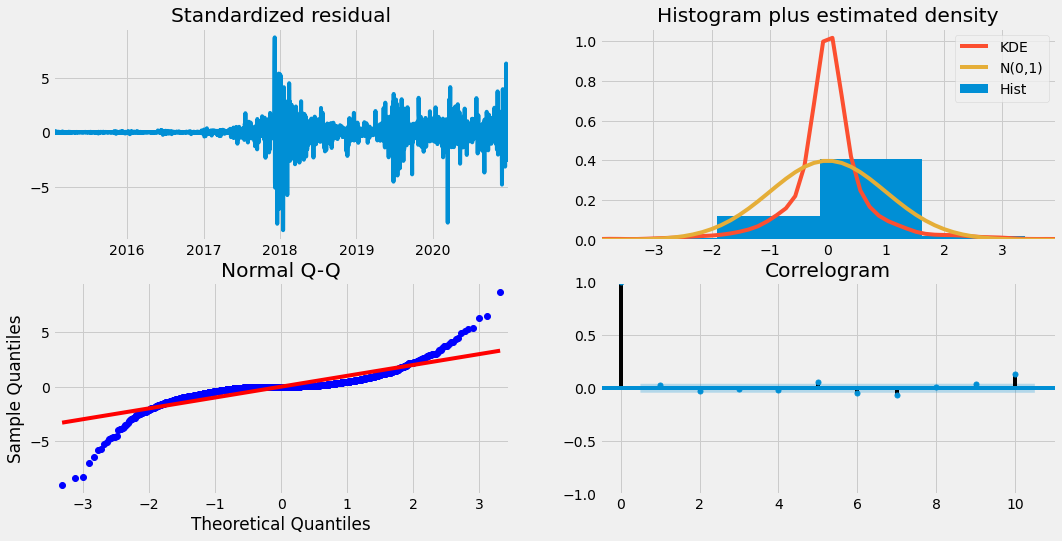

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

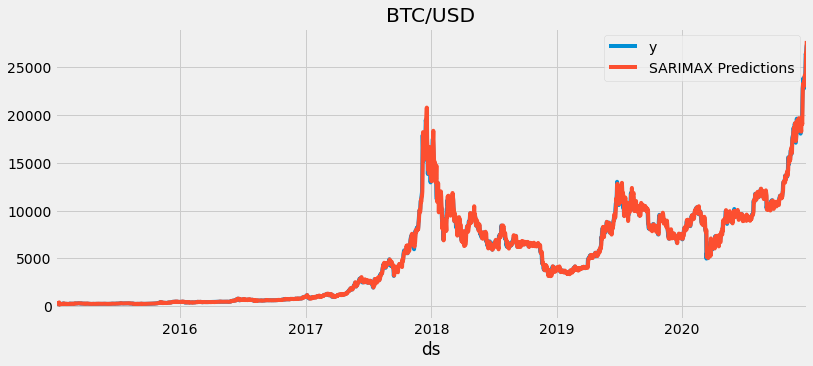

In [21]:
predictions = results.predict(start=0, end=len(price_BTC)-1, dynamic=False, typ='levels').rename('SARIMAX Predictions')
title = 'BTC/USD'
ax = price_BTC.plot(legend=True,figsize=(12,5),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)